# Методы моделирования пространственной структуры протеинов (рус)

# Семинар 1: Biopython tutorial

## 1. Installation / import

In [1]:
# install biopython via pip
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 31.6 MB/s 


## 2. Модуль PDB (работа с файлами из PDB (Protein Data Bank))

In [2]:
import Bio.PDB as pdb

### 2.1. Открытие файла PDB. Cтруктура

In [3]:
# Любой файл PDB может быть получен из базы с помощью указания ID.
# ..для этого используется объект класса PDBList:

from os.path import exists

pdb_list = pdb.PDBList()
for pdb_id in ["1FSD"]: # 1FSD is ID
    print("Fetching {}...".format(pdb_id))  
# Функция возвращает путь к скачанному файлу.
    path = pdb_list.retrieve_pdb_file(pdb_id, 
                                      pdir=".",
                                      file_format="pdb")
# Важно: если белка с таким ID нет в базе, функция всё равно вернет путь ¯\_(*_*)_/¯
    flag = exists(path)
    if flag:
        print("\tEverything is ok, file exists.")
    else:
        print("\tNo file ¯\_(*_*)_/¯.")

Fetching 1FSD...
	Everything is ok, file exists.


In [ ]:
path

# ".ent" is an extension that commonly used for PDB files.

'./pdb1fsd.ent'

In [4]:
# Для открытия файла с белком используется объект класса PDBParser():
parser = pdb.PDBParser()
struct = parser.get_structure("_", # id структуры. Может быть любым, но несколько структур не могут иметь тот же id.
                              path)

In [ ]:
struct

<Structure id=_>

Посмотрим на заголовок:

In [ ]:
print(struct.header)

{'name': 'full sequence design 1 (fsd-1) of beta beta alpha motif, nmr, 41 structures', 'head': 'novel sequence', 'idcode': '1FSD', 'deposition_date': '1997-06-09', 'release_date': '1997-11-12', 'structure_method': 'solution nmr', 'resolution': None, 'structure_reference': [], 'journal_reference': 'b.i.dahiyat,s.l.mayo de novo protein design: fully automated sequence selescience v. 278 82 1997 issn 0036-8075 9311930 10.1126/science.278.5335.82 ', 'author': 'B.I.Dahiyat,S.L.Mayo', 'compound': {'1': {'misc': '', 'molecule': 'full sequence design 1 of beta beta alpha motif', 'chain': 'a', 'engineered': 'yes'}}, 'source': {'1': {'misc': '', 'organism_scientific': 'synthetic construct', 'organism_taxid': '32630'}}, 'has_missing_residues': False, 'missing_residues': [], 'keywords': 'novel sequence, computational design', 'journal': 'AUTH   B.I.DAHIYAT,S.L.MAYOTITL   DE NOVO PROTEIN DESIGN: FULLY AUTOMATED SEQUENCE SELECTION.REF    SCIENCE                       V. 278    82 1997REFN          

In [5]:
header = struct.header
for k,v in header.items():
    print("{}: {}".format(k,v))

name: full sequence design 1 (fsd-1) of beta beta alpha motif, nmr, 41 structures
head: novel sequence
idcode: 1FSD
deposition_date: 1997-06-09
release_date: 1997-11-12
structure_method: solution nmr
resolution: None
structure_reference: []
journal_reference: b.i.dahiyat,s.l.mayo de novo protein design: fully automated sequence selescience v. 278 82 1997 issn 0036-8075 9311930 10.1126/science.278.5335.82 
author: B.I.Dahiyat,S.L.Mayo
compound: {'1': {'misc': '', 'molecule': 'full sequence design 1 of beta beta alpha motif', 'chain': 'a', 'engineered': 'yes'}}
source: {'1': {'misc': '', 'organism_scientific': 'synthetic construct', 'organism_taxid': '32630'}}
has_missing_residues: False
missing_residues: []
keywords: novel sequence, computational design
journal: AUTH   B.I.DAHIYAT,S.L.MAYOTITL   DE NOVO PROTEIN DESIGN: FULLY AUTOMATED SEQUENCE SELECTION.REF    SCIENCE                       V. 278    82 1997REFN                   ISSN 0036-8075PMID   9311930DOI    10.1126/SCIENCE.278.533

Разберем, как записан белок в этом файле. 

Белок хранится как иерархичная структура, которая имеет следующие уровни:

**Structure/Model/Chain/Residue/Atom**

Как правило, у белковых структур в Structure есть только один дочерний элемент Model, но для объектов NMR-структур (Nuclear Magnetic Resonance) их может быть несколько. Дочерние элементы Model - Chain (цепочки аминокислотных остатков (Residue)), следующий уровень - сами остатки..

Nuclear Magnetic Resonance (NMR) spectroscopy is an analytical chemistry technique used in quality control and research for determining the content and purity of a sample as well as its molecular structure. 

NMR spectroscopy is a physicochemical analysis technique that is based on the interaction of an externally applied radiofrequency radiation with atomic nuclei.
_________________

Nuclear Magnetic Resonance (NMR) / Ядерный магнитный резонанс (ЯМР).

NMR spectroscopy / ЯМР-спектроскопия.

In [6]:
for model in struct:
    print("Model {}:".format(model.id))
    for chain in model:
        print("\tChain {}:".format(chain.id))
        for residue in chain:
            print("\t\tResidue {}:".format(residue.id))
            for atom in residue.get_atoms():
                print("\t\t\t", atom)

Выходные данные были обрезаны до нескольких последних строк (5000).
			 <Atom CA>
			 <Atom C>
			 <Atom O>
			 <Atom CB>
			 <Atom CG>
			 <Atom CD>
			 <Atom NE>
			 <Atom CZ>
			 <Atom NH1>
			 <Atom NH2>
			 <Atom H>
			 <Atom HA>
			 <Atom HB2>
			 <Atom HB3>
			 <Atom HG2>
			 <Atom HG3>
			 <Atom HD2>
			 <Atom HD3>
			 <Atom HE>
			 <Atom HH11>
			 <Atom HH12>
			 <Atom HH21>
			 <Atom HH22>
		Residue (' ', 20, ' '):
			 <Atom N>
			 <Atom CA>
			 <Atom C>
			 <Atom O>
			 <Atom CB>
			 <Atom CG>
			 <Atom OD1>
			 <Atom OD2>
			 <Atom H>
			 <Atom HA>
			 <Atom HB2>
			 <Atom HB3>
		Residue (' ', 21, ' '):
			 <Atom N>
			 <Atom CA>
			 <Atom C>
			 <Atom O>
			 <Atom CB>
			 <Atom CG>
			 <Atom CD1>
			 <Atom CD2>
			 <Atom CE1>
			 <Atom CE2>
			 <Atom CZ>
			 <Atom H>
			 <Atom HA>
			 <Atom HB2>
			 <Atom HB3>
			 <Atom HD1>
			 <Atom HD2>
			 <Atom HE1>
			 <Atom HE2>
			 <Atom HZ>
		Residue (' ', 22, ' '):
			 <Atom N>
			 <Atom CA>
			 <Atom C>
			 <Atom O>
			 <Atom CB

In [ ]:
## the number of structures equals 41.
for model in struct:
    print("Model {}:".format(model.id))

Model 0:
Model 1:
Model 2:
Model 3:
Model 4:
Model 5:
Model 6:
Model 7:
Model 8:
Model 9:
Model 10:
Model 11:
Model 12:
Model 13:
Model 14:
Model 15:
Model 16:
Model 17:
Model 18:
Model 19:
Model 20:
Model 21:
Model 22:
Model 23:
Model 24:
Model 25:
Model 26:
Model 27:
Model 28:
Model 29:
Model 30:
Model 31:
Model 32:
Model 33:
Model 34:
Model 35:
Model 36:
Model 37:
Model 38:
Model 39:
Model 40:


In [ ]:
## each model has only chain A.
for model in struct:
    print("Model {}:".format(model.id))
    for chain in model:
        print("\tChain {}:".format(chain.id))

Model 0:
	Chain A:
Model 1:
	Chain A:
Model 2:
	Chain A:
Model 3:
	Chain A:
Model 4:
	Chain A:
Model 5:
	Chain A:
Model 6:
	Chain A:
Model 7:
	Chain A:
Model 8:
	Chain A:
Model 9:
	Chain A:
Model 10:
	Chain A:
Model 11:
	Chain A:
Model 12:
	Chain A:
Model 13:
	Chain A:
Model 14:
	Chain A:
Model 15:
	Chain A:
Model 16:
	Chain A:
Model 17:
	Chain A:
Model 18:
	Chain A:
Model 19:
	Chain A:
Model 20:
	Chain A:
Model 21:
	Chain A:
Model 22:
	Chain A:
Model 23:
	Chain A:
Model 24:
	Chain A:
Model 25:
	Chain A:
Model 26:
	Chain A:
Model 27:
	Chain A:
Model 28:
	Chain A:
Model 29:
	Chain A:
Model 30:
	Chain A:
Model 31:
	Chain A:
Model 32:
	Chain A:
Model 33:
	Chain A:
Model 34:
	Chain A:
Model 35:
	Chain A:
Model 36:
	Chain A:
Model 37:
	Chain A:
Model 38:
	Chain A:
Model 39:
	Chain A:
Model 40:
	Chain A:


In [7]:
for model in struct:
    print("Model {}:".format(model.id))
    for chain in model:
        print("\tChain {}:".format(chain.id))
        for residue in chain:
            print("\t\tResidue {}:".format(residue.id))

# residue can be found via this link: https://www.rcsb.org/3d-view/1FSD (like other sections).

Model 0:
	Chain A:
		Residue (' ', 1, ' '):
		Residue (' ', 2, ' '):
		Residue (' ', 3, ' '):
		Residue (' ', 4, ' '):
		Residue (' ', 5, ' '):
		Residue (' ', 6, ' '):
		Residue (' ', 7, ' '):
		Residue (' ', 8, ' '):
		Residue (' ', 9, ' '):
		Residue (' ', 10, ' '):
		Residue (' ', 11, ' '):
		Residue (' ', 12, ' '):
		Residue (' ', 13, ' '):
		Residue (' ', 14, ' '):
		Residue (' ', 15, ' '):
		Residue (' ', 16, ' '):
		Residue (' ', 17, ' '):
		Residue (' ', 18, ' '):
		Residue (' ', 19, ' '):
		Residue (' ', 20, ' '):
		Residue (' ', 21, ' '):
		Residue (' ', 22, ' '):
		Residue (' ', 23, ' '):
		Residue (' ', 24, ' '):
		Residue (' ', 25, ' '):
		Residue (' ', 26, ' '):
		Residue (' ', 27, ' '):
		Residue (' ', 28, ' '):
Model 1:
	Chain A:
		Residue (' ', 1, ' '):
		Residue (' ', 2, ' '):
		Residue (' ', 3, ' '):
		Residue (' ', 4, ' '):
		Residue (' ', 5, ' '):
		Residue (' ', 6, ' '):
		Residue (' ', 7, ' '):
		Residue (' ', 8, ' '):
		Residue (' ', 9, ' '):
		Residue (' ', 10

As we see, there are 28 residues (highlighthed in pink).

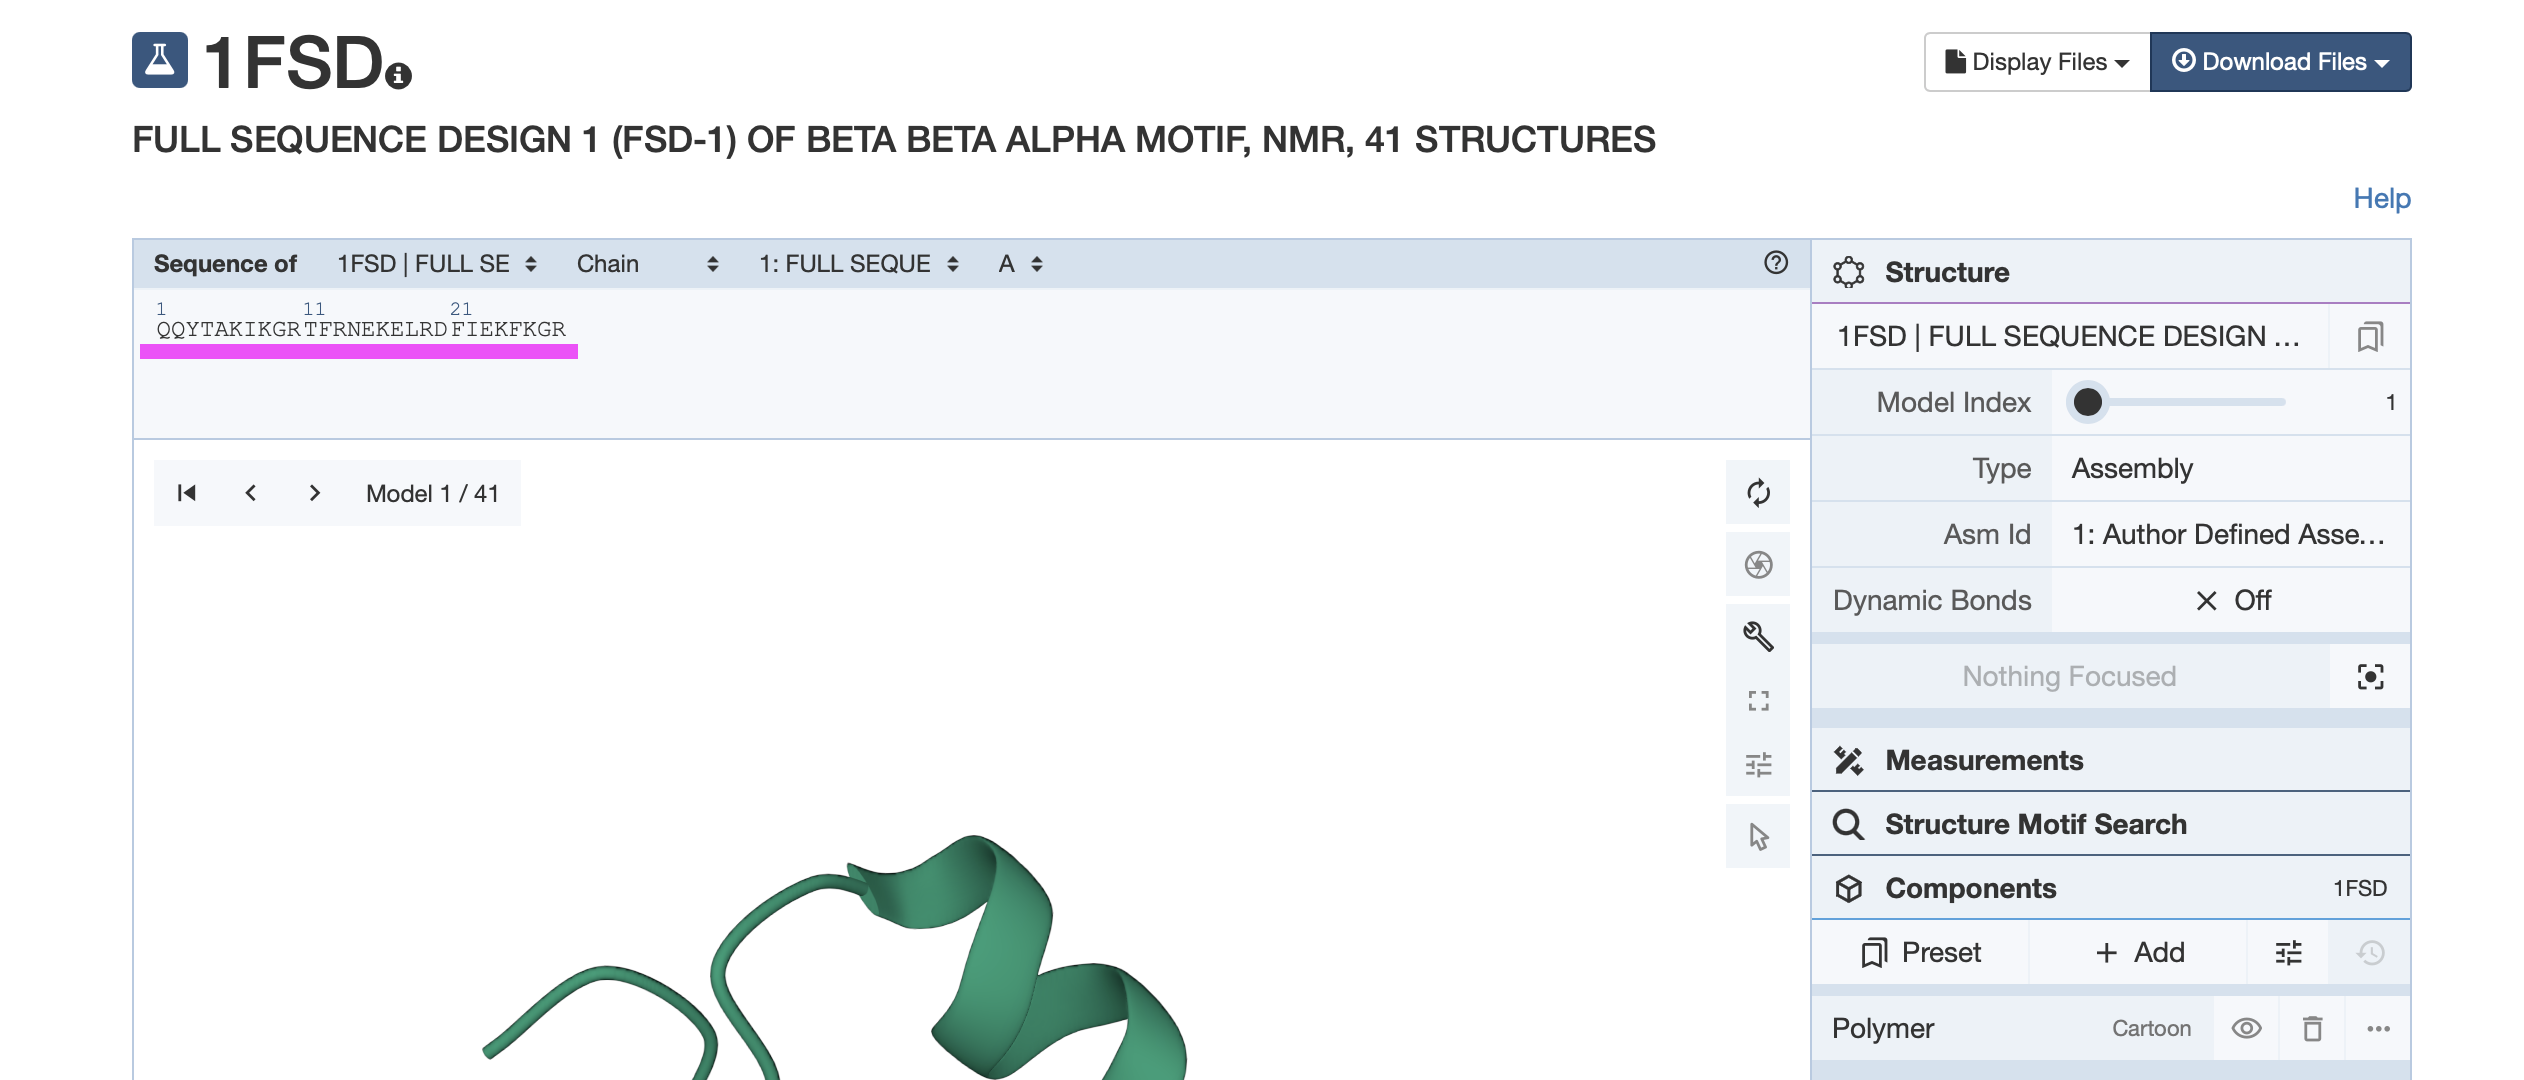

Также все аминокислоты и все атомы можно получить с помощью следующих методов:

_print(struct.get_residues())_

_print(struct.get_atoms())_

В Biopython методы вида .get_* (для получения набора объектов) возвращают итерируемый, но не индексируемый объект.. Чтобы работать с запрашиваемыми элементами как с массивом, нужно либо преобразовать вывод функции к структуре list:

In [8]:
print("Для сравнения:\n")
residues = struct.get_residues()
print("Результат get_residues:", residues)
print("Результат преобразования к list:", list(residues))

Для сравнения:

Результат get_residues: <generator object Structure.get_residues at 0x7f008d18b2d0>
Результат преобразования к list: [<Residue GLN het=  resseq=1 icode= >, <Residue GLN het=  resseq=2 icode= >, <Residue TYR het=  resseq=3 icode= >, <Residue THR het=  resseq=4 icode= >, <Residue ALA het=  resseq=5 icode= >, <Residue LYS het=  resseq=6 icode= >, <Residue ILE het=  resseq=7 icode= >, <Residue LYS het=  resseq=8 icode= >, <Residue GLY het=  resseq=9 icode= >, <Residue ARG het=  resseq=10 icode= >, <Residue THR het=  resseq=11 icode= >, <Residue PHE het=  resseq=12 icode= >, <Residue ARG het=  resseq=13 icode= >, <Residue ASN het=  resseq=14 icode= >, <Residue GLU het=  resseq=15 icode= >, <Residue LYS het=  resseq=16 icode= >, <Residue GLU het=  resseq=17 icode= >, <Residue LEU het=  resseq=18 icode= >, <Residue ARG het=  resseq=19 icode= >, <Residue ASP het=  resseq=20 icode= >, <Residue PHE het=  resseq=21 icode= >, <Residue ILE het=  resseq=22 icode= >, <Residue GLU het=

либо вызвать метод .get_list() у родительского типа в иерархии Structure/Model/Chain/Residue/Atom:

In [9]:
residue = list(struct.get_residues())[0] # 0 means Model 0
print("Атомы этого Residue:", residue.get_list())

Атомы этого Residue: [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD>, <Atom OE1>, <Atom NE2>, <Atom H1>, <Atom H2>, <Atom H3>, <Atom HA>, <Atom HB2>, <Atom HB3>, <Atom HG2>, <Atom HG3>, <Atom HE21>, <Atom HE22>]


In [10]:
chain = list(struct.get_chains())[40] # 40 means Model 40
print("Residues этого Chain:", chain.get_list())

Residues этого Chain: [<Residue GLN het=  resseq=1 icode= >, <Residue GLN het=  resseq=2 icode= >, <Residue TYR het=  resseq=3 icode= >, <Residue THR het=  resseq=4 icode= >, <Residue ALA het=  resseq=5 icode= >, <Residue LYS het=  resseq=6 icode= >, <Residue ILE het=  resseq=7 icode= >, <Residue LYS het=  resseq=8 icode= >, <Residue GLY het=  resseq=9 icode= >, <Residue ARG het=  resseq=10 icode= >, <Residue THR het=  resseq=11 icode= >, <Residue PHE het=  resseq=12 icode= >, <Residue ARG het=  resseq=13 icode= >, <Residue ASN het=  resseq=14 icode= >, <Residue GLU het=  resseq=15 icode= >, <Residue LYS het=  resseq=16 icode= >, <Residue GLU het=  resseq=17 icode= >, <Residue LEU het=  resseq=18 icode= >, <Residue ARG het=  resseq=19 icode= >, <Residue ASP het=  resseq=20 icode= >, <Residue PHE het=  resseq=21 icode= >, <Residue ILE het=  resseq=22 icode= >, <Residue GLU het=  resseq=23 icode= >, <Residue LYS het=  resseq=24 icode= >, <Residue PHE het=  resseq=25 icode= >, <Residue LY

Наверное, второй способ предпочтительнее: в первом случае мы получаем все объекты целевого уровня. В результате мы можем получить, например, атомы всех цепочек, хотя нам нужны атомы лишь из одной цепи.

Напротив, можно получить родительский элемент иерархии с помощью метода .get_parent():

In [ ]:
print("Родительский элемент Residue (= Chain):", residue.get_parent())

Родительский элемент Residue (= Chain): <Chain id=A>


In [ ]:
print("Родительский элемент Atom (=Residue):", atom.get_parent())

# видим, берется результат для последнего атома из массива

Родительский элемент Atom (=Residue): <Residue ARG het=  resseq=28 icode= >


### 2.2. Работа с остатками и атомами

#### 2.2.1. Остатки / Residues.

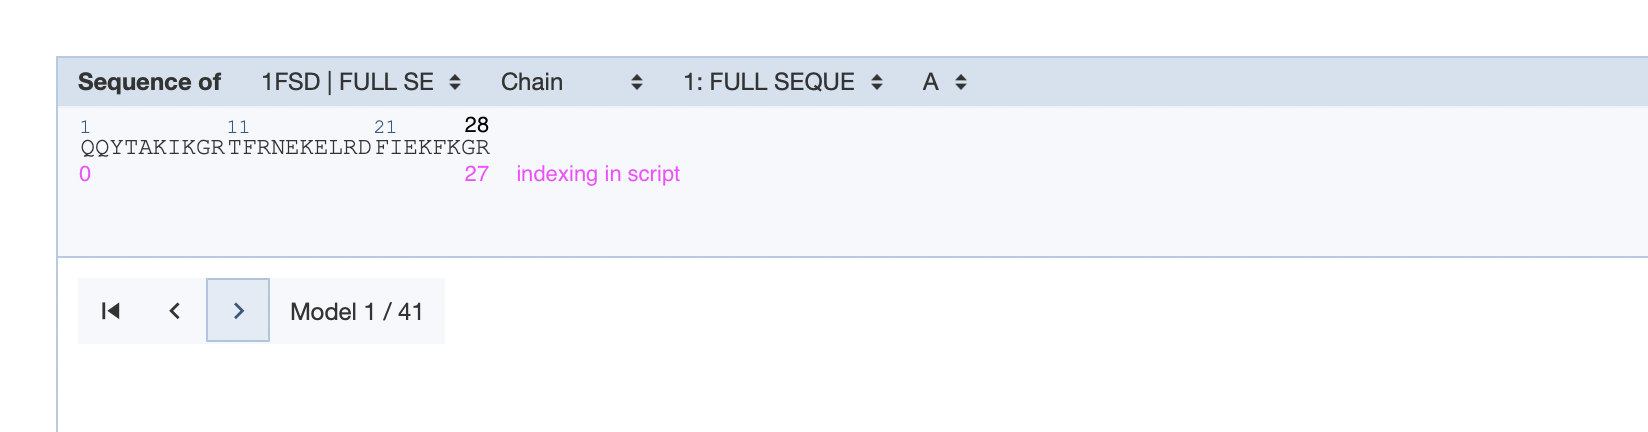

In [11]:
residue = list(struct.get_residues())[0]
print("Обозначение аминокислоты:", residue.get_resname())
print("Атомы остатка:", residue.get_list())
#
print("Получение атома остатка по его обозначению:", residue["CA"])

Обозначение аминокислоты: GLN
Атомы остатка: [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD>, <Atom OE1>, <Atom NE2>, <Atom H1>, <Atom H2>, <Atom H3>, <Atom HA>, <Atom HB2>, <Atom HB3>, <Atom HG2>, <Atom HG3>, <Atom HE21>, <Atom HE22>]
Получение атома остатка по его обозначению: <Atom CA>


In [ ]:
residue = list(struct.get_residues())[2]
print("Обозначение аминокислоты:", residue.get_resname())
print("Атомы остатка:", residue.get_list())
#
print("Получение атома остатка по его обозначению:", residue["CD1"])

Обозначение аминокислоты: TYR
Атомы остатка: [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD1>, <Atom CD2>, <Atom CE1>, <Atom CE2>, <Atom CZ>, <Atom OH>, <Atom H>, <Atom HA>, <Atom HB2>, <Atom HB3>, <Atom HD1>, <Atom HD2>, <Atom HE1>, <Atom HE2>, <Atom HH>]
Получение атома остатка по его обозначению: <Atom CD1>


In [ ]:
residue = list(struct.get_residues())[27]
print("Обозначение аминокислоты:", residue.get_resname())
print("Атомы остатка:", residue.get_list())
#
print("Получение атома остатка по его обозначению:", residue["NH1"])

Обозначение аминокислоты: ARG
Атомы остатка: [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD>, <Atom NE>, <Atom CZ>, <Atom NH1>, <Atom NH2>, <Atom OXT>, <Atom H>, <Atom HA>, <Atom HB2>, <Atom HB3>, <Atom HG2>, <Atom HG3>, <Atom HD2>, <Atom HD3>, <Atom HE>, <Atom HH11>, <Atom HH12>, <Atom HH21>, <Atom HH22>]
Получение атома остатка по его обозначению: <Atom NH1>


In [ ]:
residue = list(struct.get_residues())[28]
print("Обозначение аминокислоты:", residue.get_resname())
print("Атомы остатка:", residue.get_list())
#
print("Получение атома остатка по его обозначению:", residue["CA"])

# интересно, что если взять 28-ой остаток (по индексации в python), то ошибка не выйдет, а результат будет получен для самого первого остатка, i.e.,
# индексация начнется сначала 28 -> 0, 29 -> 1, etc.

#### 2.2.2. Атомы / Atoms.

In [13]:
##
residue = list(struct.get_residues())[0]
print("Обозначение аминокислоты:", residue.get_resname())
print("Атомы остатка:", residue.get_list())

Обозначение аминокислоты: GLN
Атомы остатка: [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD>, <Atom OE1>, <Atom NE2>, <Atom H1>, <Atom H2>, <Atom H3>, <Atom HA>, <Atom HB2>, <Atom HB3>, <Atom HG2>, <Atom HG3>, <Atom HE21>, <Atom HE22>]


In [14]:
atom = residue.get_list()[5] # пятый атом (индексация в python с 0)
print("Объект Atom", atom)
print("Обозначение атома:", atom.get_fullname())
print("Химический элемент:", atom.element)
print("Координаты атома (тип Vector):", atom.get_vector())
print("Координаты атома (тип list):", atom.get_coord())
print("Масса атома:", atom.mass)

Объект Atom <Atom CG>
Обозначение атома:  CG 
Химический элемент: C
Координаты атома (тип Vector): <Vector -15.47, 3.55, 0.68>
Координаты атома (тип list): [-15.473   3.553   0.682]
Масса атома: 12.0107


Некоторые поля, получаемые с помощью методов .get_*, также могут быть получены с помощью обращения к полям объекта:

In [ ]:
print(atom.get_fullname())
print(atom.fullname)

 CG 
 CG 


### 2.3. Вычисления

<img src="https://www.webmo.net/link/help/img/blbada.jpg"></img>

**Bond length / Длина химической связи** — расстояние между ядрами химически связанных атомов.

**Bond angle / Валентный угол** – это угол между связями, которые образует атом в молекуле (in other words, угол между двумя связями, имеющими общий
атом).

**Dihedral angle / Двугранный угол** — пространственная геометрическая фигура, образованная двумя полуплоскостями, исходящими из одной прямой, а также часть пространства, ограниченная этими полуплоскостями.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
cg = residue["CG"]
cb = residue["CB"]
ca = residue["CA"]
n = residue["N"]

In [ ]:
##
residue.get_list() # e.g., CA means alpha carbon, CB - beta carbon, CG - gamma carbon.

[<Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD>,
 <Atom OE1>,
 <Atom NE2>,
 <Atom H1>,
 <Atom H2>,
 <Atom H3>,
 <Atom HA>,
 <Atom HB2>,
 <Atom HB3>,
 <Atom HG2>,
 <Atom HG3>,
 <Atom HE21>,
 <Atom HE22>]

e.g., NH3 means: Atom N, Atom H1, Atom H2, Atom H3..

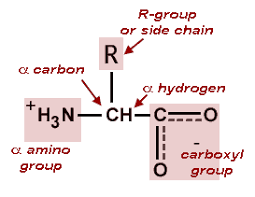

p.s. Structural formulae of the 20 amino acids are shown here: https://atlasgeneticsoncology.org/teaching/30066/amino-acids-%28reminder%29.


Some information about the alpha/beta/gamma/.. carbon is represented below:

________

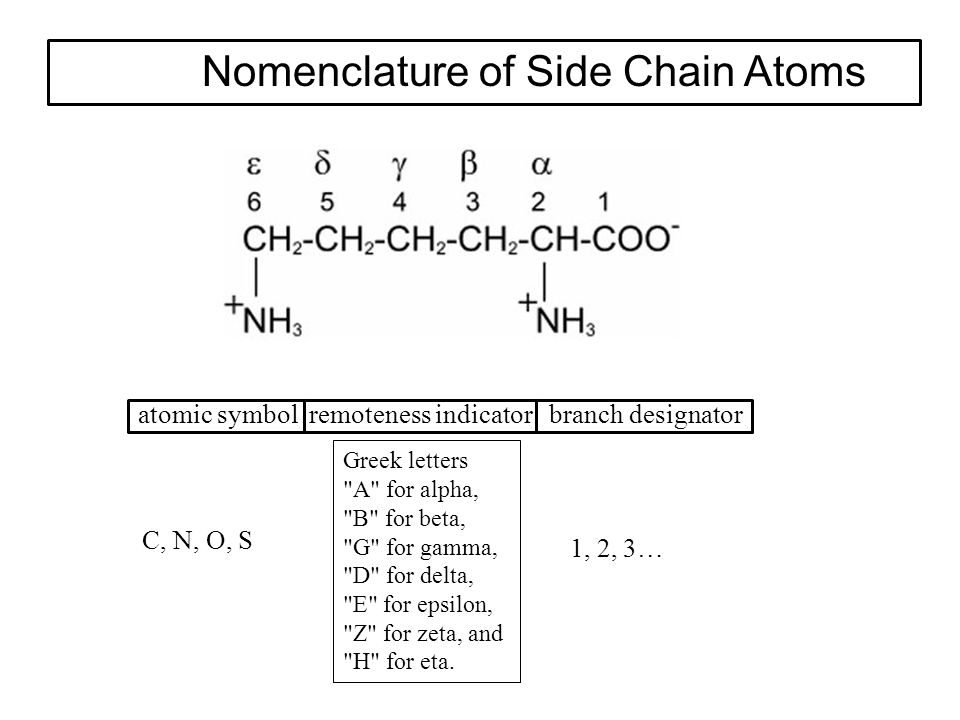

- Расстояние между атомами вычисляется как их разность (порядок не важен):

In [ ]:
print("Расстояние между", cg.fullname, "и", cb.fullname, "равно", cg - cb)

Расстояние между  CG  и  CB  равно 1.5305375


In [ ]:
## just check it (that the order doesn't matter):
print("Расстояние между", cg.fullname, "и", cb.fullname, "равно", cb - cg)

Расстояние между  CG  и  CB  равно 1.5305375


- Пример: построение матрицы расстояний/контактов:

**Матрица расстояний** — это матрица n × n, которая содержит значения меры расстояния/сходства между объектами в метрическом пространстве.

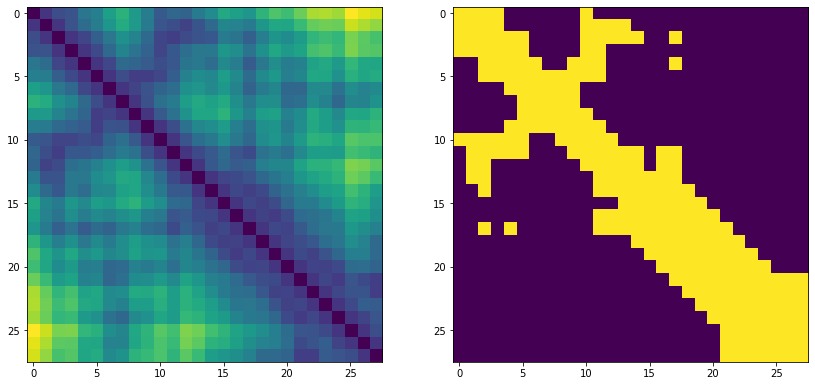

In [17]:
residues = struct[0].child_list[0].child_list
matr = np.zeros((len(residues), len(residues))) # 28×28

for i, r1 in enumerate(residues): # функция enumerate() позволяет получить и индекс элемента, и его значение.
    for j, r2 in enumerate(residues[i+1:]):
        matr[i,i+1+j] = r1["CA"]-r2["CA"]
        # x = from i to i+1+j means from 0 to 27
        matr[i+1+j,i] = r1["CA"]-r2["CA"]
        # y = from i+1+j to i means from 27 to 0 (y-axis)

R = 8

_, axs = plt.subplots(1,2,figsize=(14,7)) # 1,2 means 1 line w/ 2 pictures
axs[0].imshow(matr)
axs[1].imshow(matr < R) # yellow zone means < R
plt.show()

In [ ]:
##
for i, r1 in enumerate(residues):
  print(i,r1)

0 <Residue GLN het=  resseq=1 icode= >
1 <Residue GLN het=  resseq=2 icode= >
2 <Residue TYR het=  resseq=3 icode= >
3 <Residue THR het=  resseq=4 icode= >
4 <Residue ALA het=  resseq=5 icode= >
5 <Residue LYS het=  resseq=6 icode= >
6 <Residue ILE het=  resseq=7 icode= >
7 <Residue LYS het=  resseq=8 icode= >
8 <Residue GLY het=  resseq=9 icode= >
9 <Residue ARG het=  resseq=10 icode= >
10 <Residue THR het=  resseq=11 icode= >
11 <Residue PHE het=  resseq=12 icode= >
12 <Residue ARG het=  resseq=13 icode= >
13 <Residue ASN het=  resseq=14 icode= >
14 <Residue GLU het=  resseq=15 icode= >
15 <Residue LYS het=  resseq=16 icode= >
16 <Residue GLU het=  resseq=17 icode= >
17 <Residue LEU het=  resseq=18 icode= >
18 <Residue ARG het=  resseq=19 icode= >
19 <Residue ASP het=  resseq=20 icode= >
20 <Residue PHE het=  resseq=21 icode= >
21 <Residue ILE het=  resseq=22 icode= >
22 <Residue GLU het=  resseq=23 icode= >
23 <Residue LYS het=  resseq=24 icode= >
24 <Residue PHE het=  resseq=25 ico

In [ ]:
##
for i, r1 in enumerate(residues):
  print(r1["CA"])

# as it is shown, each residue has CA.

<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>
<Atom CA>


In [ ]:
##
for i, r1 in enumerate(residues):
  for j, r2 in enumerate(residues[i+1:]):
    print(r1,r2)

<Residue GLN het=  resseq=1 icode= > <Residue GLN het=  resseq=2 icode= >
<Residue GLN het=  resseq=1 icode= > <Residue TYR het=  resseq=3 icode= >
<Residue GLN het=  resseq=1 icode= > <Residue THR het=  resseq=4 icode= >
<Residue GLN het=  resseq=1 icode= > <Residue ALA het=  resseq=5 icode= >
<Residue GLN het=  resseq=1 icode= > <Residue LYS het=  resseq=6 icode= >
<Residue GLN het=  resseq=1 icode= > <Residue ILE het=  resseq=7 icode= >
<Residue GLN het=  resseq=1 icode= > <Residue LYS het=  resseq=8 icode= >
<Residue GLN het=  resseq=1 icode= > <Residue GLY het=  resseq=9 icode= >
<Residue GLN het=  resseq=1 icode= > <Residue ARG het=  resseq=10 icode= >
<Residue GLN het=  resseq=1 icode= > <Residue THR het=  resseq=11 icode= >
<Residue GLN het=  resseq=1 icode= > <Residue PHE het=  resseq=12 icode= >
<Residue GLN het=  resseq=1 icode= > <Residue ARG het=  resseq=13 icode= >
<Residue GLN het=  resseq=1 icode= > <Residue ASN het=  resseq=14 icode= >
<Residue GLN het=  resseq=1 icode

In [ ]:
##
for i, r1 in enumerate(residues):
  for j, r2 in enumerate(residues[i+1:]):
    print(r1["CA"]-r2["CA"])

3.8327055
6.0198884
6.585186
10.077456
11.085014
14.467447
16.453587
13.83951
10.877389
7.276077
8.491094
8.154116
10.436587
12.435888
15.475291
14.644343
13.406844
16.736387
18.605722
17.672775
19.789135
22.429478
22.606857
22.018656
25.677992
24.638765
24.029545
3.839968
6.598132
9.081234
10.864393
13.538717
15.752424
13.863769
10.566824
6.7837462
6.1337767
4.9732614
6.65948
8.868072
11.79633
11.334711
10.486308
13.567951
15.443651
15.081705
17.344
19.619701
20.0842
19.95783
23.573631
22.555403
21.486
3.8207734
5.3799176
7.815884
10.15262
12.861805
11.498886
8.77125
5.36449
4.7952495
5.929162
6.543722
7.1159787
10.459665
9.856784
7.84574
10.938435
13.263415
12.504301
14.223248
16.881441
17.594858
17.02874
20.502235
19.16403
18.225536
3.8443995
5.660809
8.779503
11.616108
9.823523
8.068319
5.382695
7.046934
9.247257
10.25885
10.245998
13.583845
12.592688
9.826965
12.925771
15.340548
13.769233
14.895706
18.116327
18.652891
17.299566
20.650629
19.081682
18.78187
3.8286114
5.5028377
8.92

In [ ]:
##
for i, r1 in enumerate(residues):
  print(i,i+1+j)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 13
13 14
14 15
15 16
16 17
17 18
18 19
19 20
20 21
21 22
22 23
23 24
24 25
25 26
26 27
27 28


In [ ]:
##
# if we change "CA" to "CB", we get an error:
residues = struct[0].child_list[0].child_list
matr = np.zeros((len(residues), len(residues)))

for i, r1 in enumerate(residues):
    for j, r2 in enumerate(residues[i+1:]):
      matr[i,i+1+j] = r1["CB"]-r2["CB"]
      matr[i+1+j,i] = r1["CB"]-r2["CB"]

R = 8

_, axs = plt.subplots(1,2,figsize=(14,7))
axs[0].imshow(matr)
axs[1].imshow(matr < R)
plt.show()

# This is because not all the residues have the beta carbon in their structures.

KeyError: ignored

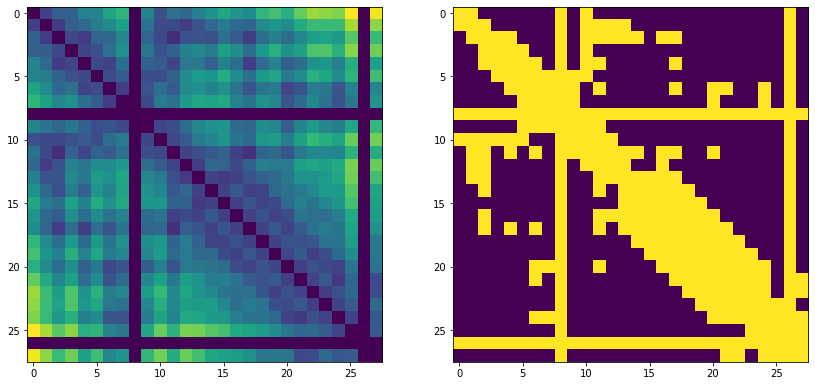

In [ ]:
##
# just to show how the try-except construction works to handle exceptions (means errors):
residues = struct[0].child_list[0].child_list
matr = np.zeros((len(residues), len(residues)))

for i, r1 in enumerate(residues):
    for j, r2 in enumerate(residues[i+1:]):
      try:
          matr[i,i+1+j] = r1["CB"]-r2["CB"]
          matr[i+1+j,i] = r1["CB"]-r2["CB"]
      except KeyError:
          pass

R = 8

_, axs = plt.subplots(1,2,figsize=(14,7))
axs[0].imshow(matr)
axs[1].imshow(matr < R) # yellow zone means < R
plt.show()

In [ ]:
## p.s. how to find the distance between 2 atoms (e.g., r1["CA"] and r2["CA"])
# r1, r2 means residue 1 and residue 2

In [ ]:
residues[0]

<Residue GLN het=  resseq=1 icode= >

In [ ]:
[i for i in residues[0]]
# the atoms that the residue 1 (GLN) contains.

[<Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD>,
 <Atom OE1>,
 <Atom NE2>,
 <Atom H1>,
 <Atom H2>,
 <Atom H3>,
 <Atom HA>,
 <Atom HB2>,
 <Atom HB3>,
 <Atom HG2>,
 <Atom HG3>,
 <Atom HE21>,
 <Atom HE22>]

In [ ]:
residues[0]["CA"].coord
# the x, y, z coordinates of the CA of the 1st residue.

array([-13.417,   2.471,  -0.238], dtype=float32)

In [ ]:
residues[1]["CA"].coord

array([-10.228,   4.486,   0.44 ], dtype=float32)

In [ ]:
residues[0]["CA"]-residues[1]["CA"]
# the distance between the two atoms can be calculated as follows..

3.8327055

In [ ]:
# ..the same one.
np.sqrt((-13.417+10.228)**2+(2.471-4.486)**2+(-0.238-0.44)**2)

3.8327053108737696

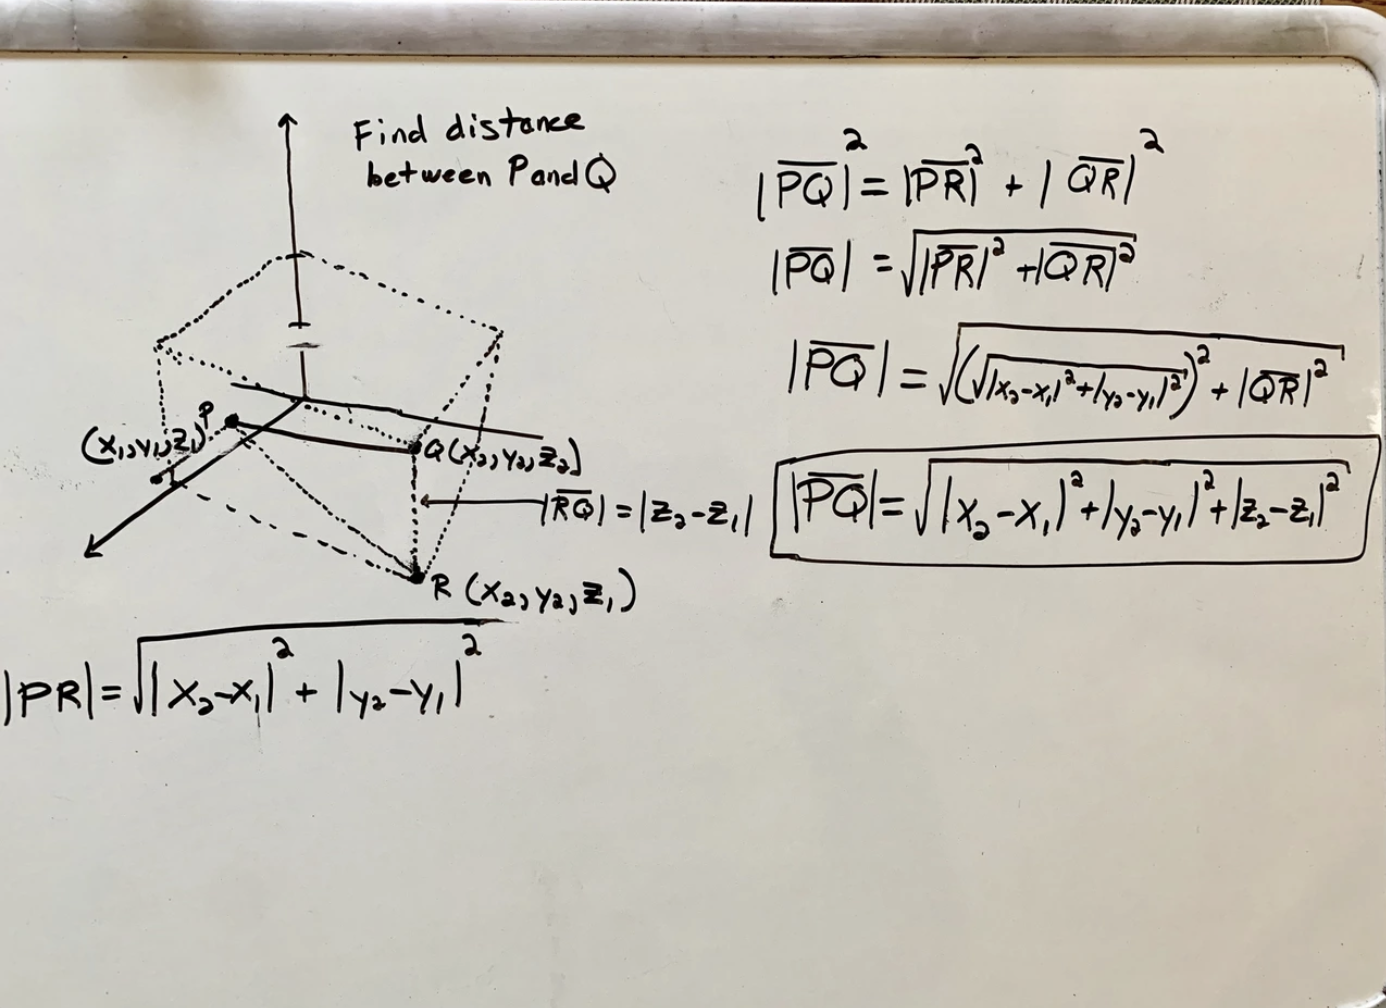

- Планарные углы:

планарный - (геометр.) расположенный на плоскости; плоский.

In [18]:
angle = pdb.calc_angle(cg.get_vector(), cb.get_vector(), ca.get_vector())
print("Угол CA-CB-CG равен {} ({} градусов)".format(angle, angle/np.pi*180))

Угол CA-CB-CG равен 1.91095317719426 (109.48955190034646 градусов)


In [ ]:
##
angle = pdb.calc_angle(ca.get_vector(), cb.get_vector(), cg.get_vector())
print("Угол CA-CB-CG равен {} ({} градусов)".format(angle, angle/np.pi*180))

Угол CA-CB-CG равен 1.91095317719426 (109.48955190034646 градусов)


- Двугранные (торсионные) углы:

**Двугранным углом** называется фигура, образованная двумя полуплоскостями с общей граничной прямой.

**Линейным углом двугранного угла** называется угол, образованный лучами с вершиной на граничной прямой, стороны которого лежат на гранях двугранного угла и перпендикулярны граничной прямой.

**Величиной двугранного угла** называется величина его линейного угла.

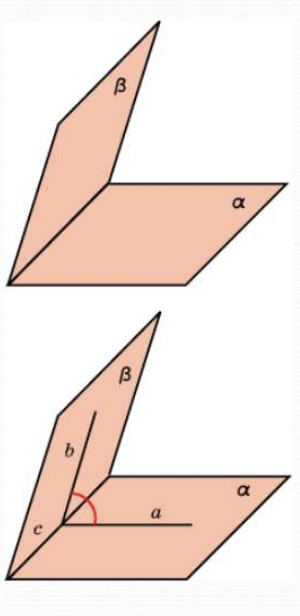

Для однозначного определения конформации молекулы используются **торсионные углы**. Торсионный угол (вокруг какой-либо связи) — это двугранный угол, определяющий взаимный поворот частей молекулы, находящихся по разные стороны от этой связи. Удобной моделью для демонстрации торсионных углов является условная система из четырех атомов (А–В–С–D), как на рисунке ниже. 

Торсионный угол вокруг связи B–C — это двугранный угол между плоскостями, в которых лежат атомы A,B,C и B,C,D.
____
**Конформация** (от лат. conformatio «форма, построение, расположение»)  – это пространственное расположение атомов в молекуле, которое достигается без нарушения целостности молекулы.


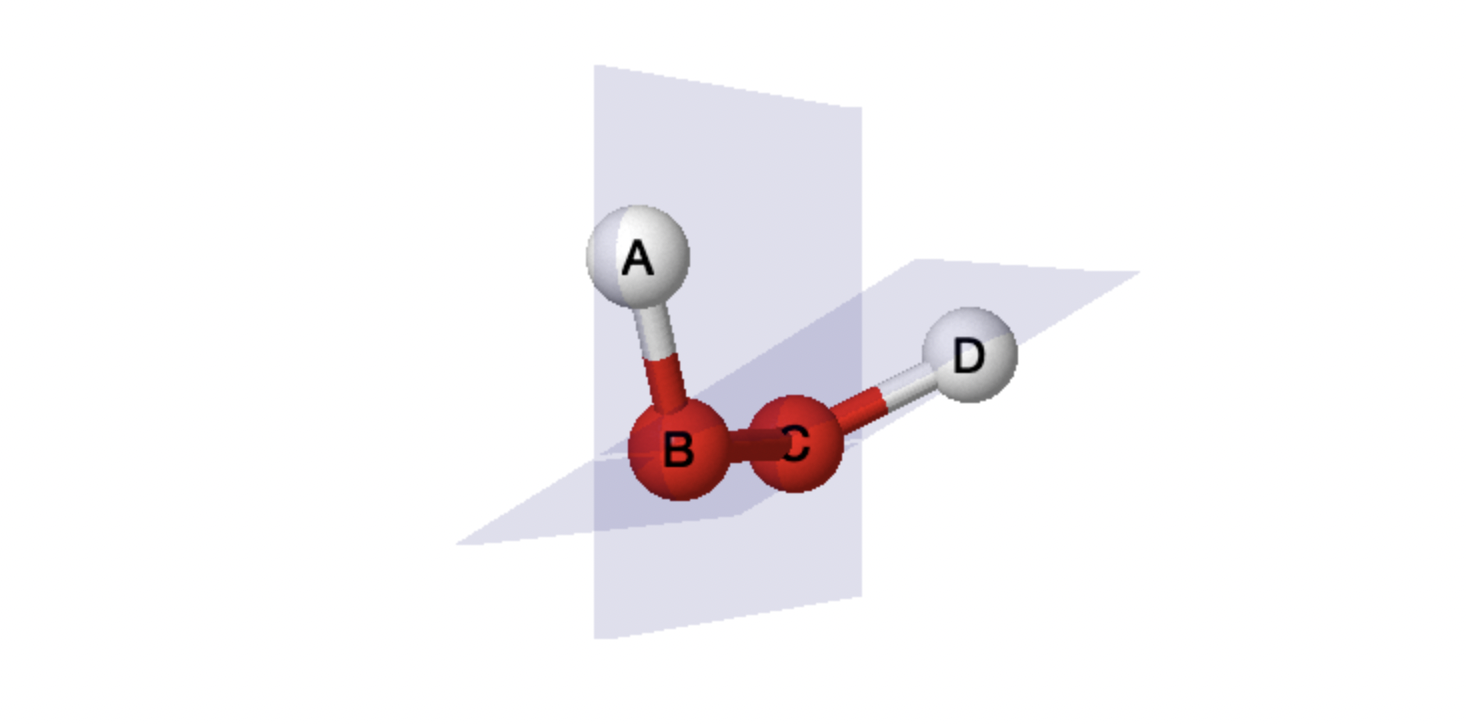

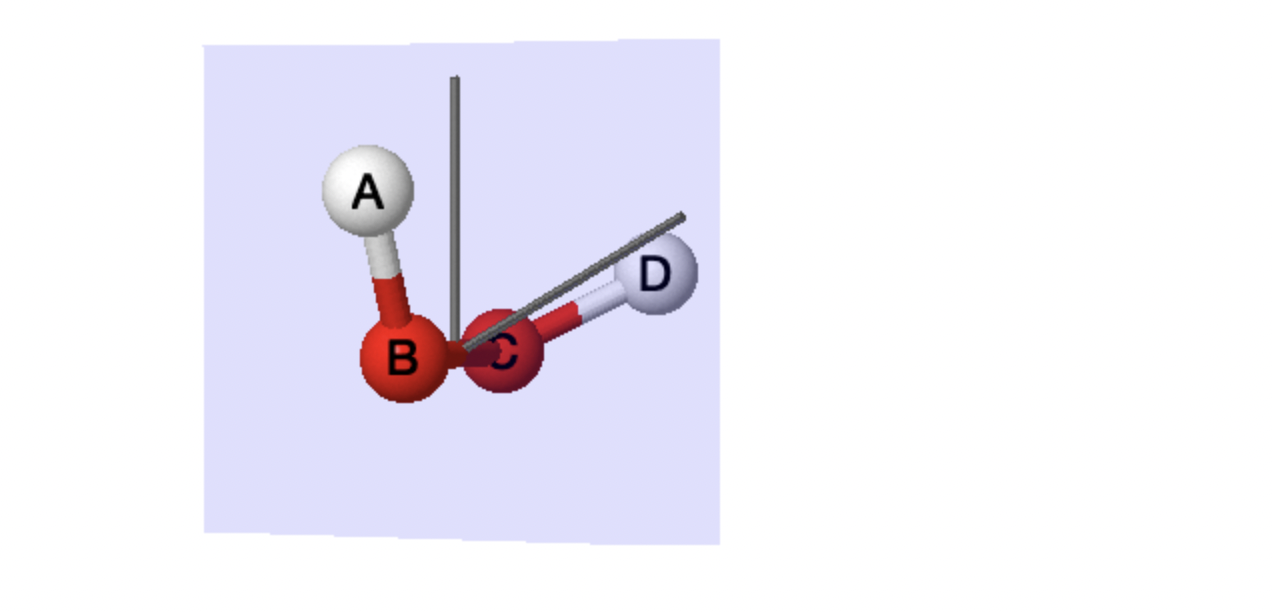

Отсчет величины угла ведут от связи, ближней к наблюдателю, и до связи, удаленной от наблюдателя. Если мысленное движение по кратчайшему пути от ближней связи к дальней происходит по часовой стрелке, угол считается положительным; если против часовой стрелки — отрицательным. 

p.s. Торсионный угол не зависит от того, с какой стороны смотреть: со стороны атома «B» или со стороны атома «C». 

Таким образом, торсионный угол может принимать значения от –180° до 180°. 

p.s. Естественно, крайние значения — –180° и 180° — соответствуют одной и той же конформации. 

In [19]:
chi1 = pdb.calc_dihedral(n.get_vector(), ca.get_vector(), cb.get_vector(), cg.get_vector())
print("Угол chi1 равен", chi1/np.pi*180, "градусов")

Угол chi1 равен -144.32951156375964 градусов


- Пример: построение карты Рамачандрана:

**Карта Рамачандрана** — способ визуализации двугранных углов аминокислот полипептидной основы в белках.

Карта Рамачандрана позволяет с высокой степенью точности определить вторичную структуру белка.

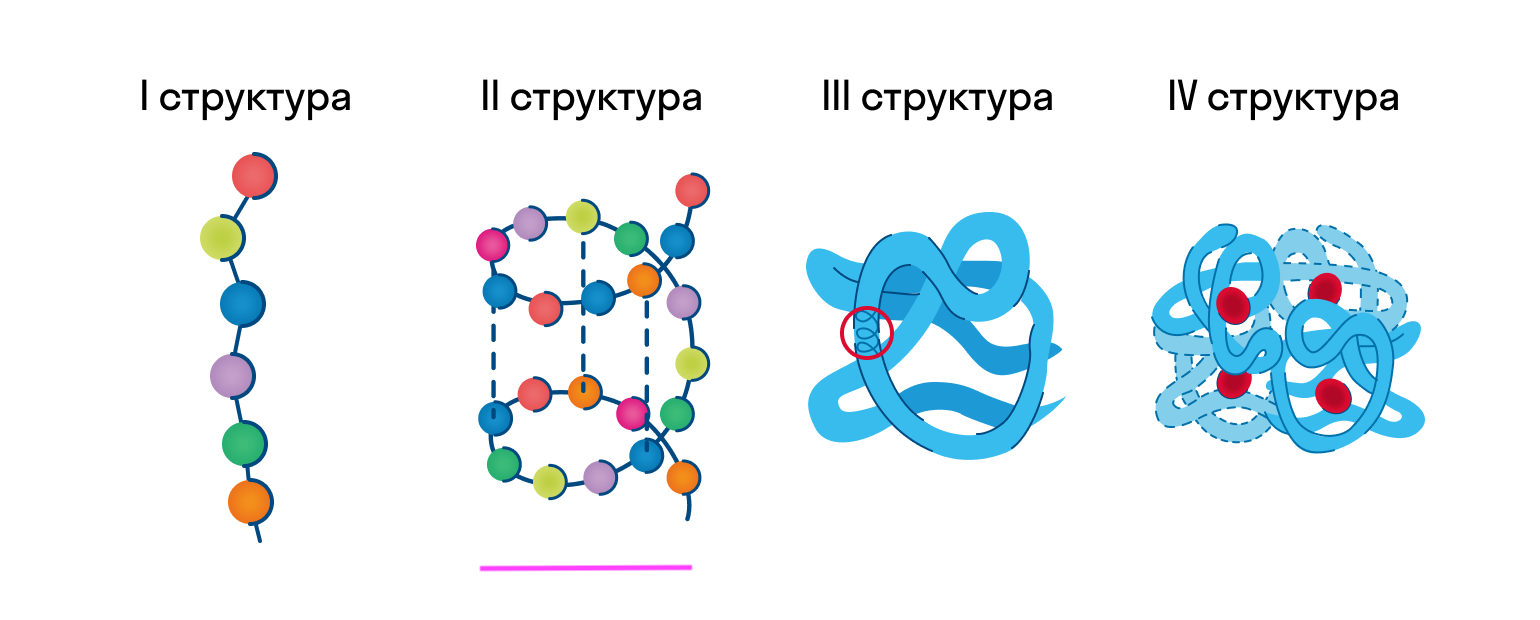

_____________

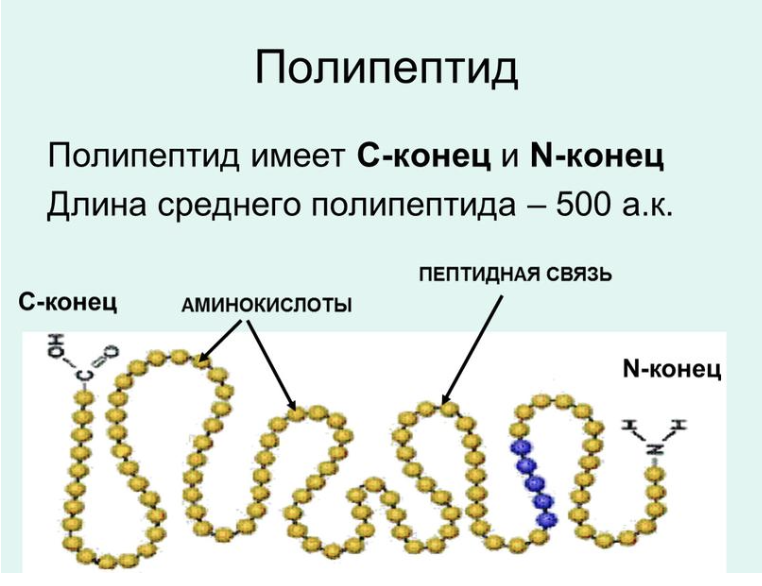

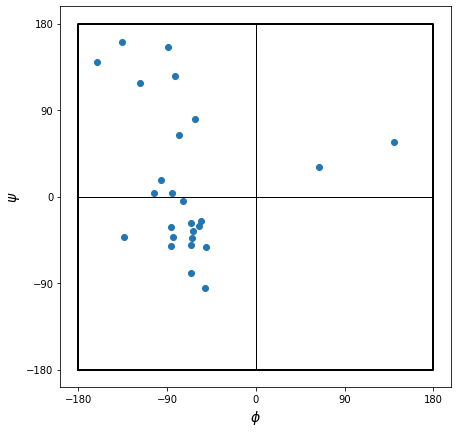

In [83]:
ang_pairs = np.empty((0,2)) # касаемо np.empty: функция empty в отличие от функций zeros и ones не устанавливает элементы массива
# в определенное значение (0 и 1) и работает немного быстрее.. В результате работы функции empty все элементы приобретают случайное значение,
# однако, использовать эту функцию в качестве генератора псевдослучайных чисел настоятельно не рекомендуется..
# Использовать np.empty стоит только в том случае, если мы собираемся самостоятельно инициализировать эти значения в массиве; В противном случае
# лучше использовать что-то вроде np.zeros(12) или какую-либо другую функцию, которая инициализирует значения.
# p.s. А так функция может оказаться полезной, если в коде приходится очень часто создавать временные массивы.

for i in range(1,len(residues)-1): # to count phi and psi we don't take into account the first and last residues.
  phi = pdb.calc_dihedral(residues[i-1]["C"].get_vector(),
                            residues[i]["N"].get_vector(),
                            residues[i]["CA"].get_vector(),
                            residues[i]["C"].get_vector()
                           )
  psi = pdb.calc_dihedral(residues[i]["N"].get_vector(),
                            residues[i]["CA"].get_vector(),
                            residues[i]["C"].get_vector(),
                            residues[i+1]["N"].get_vector()
                           )
  ang_pairs = np.vstack((ang_pairs,np.array([phi,psi])/np.pi*180)) # касаемо np.vstack: функция vstack() соединяет массивы по вертикали. 
# По своей сути такое соединение эквивалентно соединению массивов вдоль первой (индекс оси равен 0) оси. 
# Одномерные массивы соединяются построчно в двумерные массивы. например:
# >>> a = np.array([1, 1, 1])
# >>> b = np.array([2, 2, 2])
# >>> np.vstack((a, b))
# array([[1, 1, 1],
#        [2, 2, 2]])

plt.figure(figsize=(7,7))
plt.scatter(*ang_pairs.T)
plt.plot([-180, -180, 180, 180, -180], [-180, 180, 180, -180, -180], c="black", linewidth=2)
plt.plot([0,0], [-180,180], c="black", linewidth=1)
plt.plot([-180,180], [0,0], c="black", linewidth=1)
plt.xticks(np.arange(-180, 181, 90))
plt.yticks(np.arange(-180, 181, 90))

plt.xlabel("$\phi$", fontsize=14)
plt.ylabel("$\psi$", fontsize=14)

plt.show()

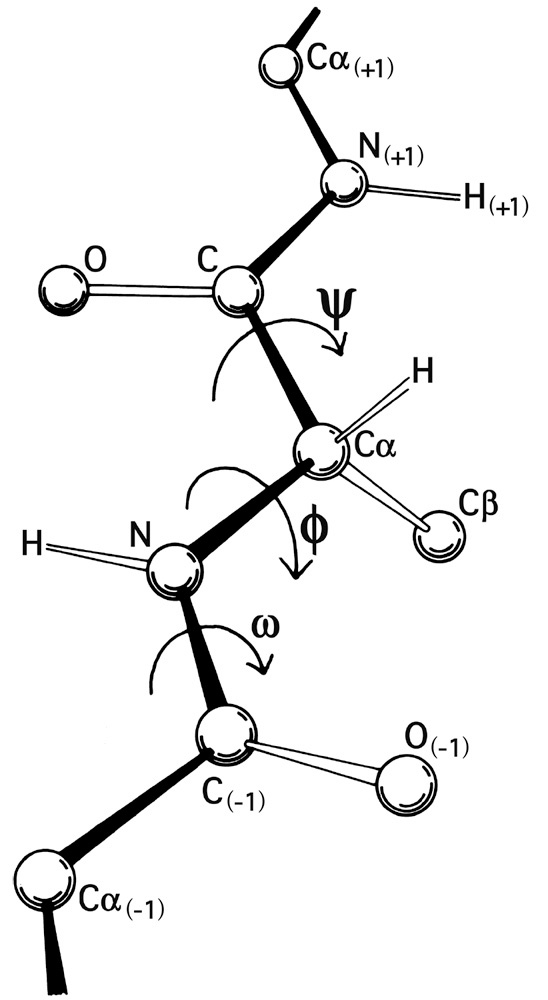

In [85]:
##
print(np.empty((1,2))) # ~ y,x

[[7. 7.]]


In [82]:
## 
residues[i]["C"].get_vector()

<Vector 10.12, -3.29, -4.84>

In [84]:
## ..the same like that:
residues[i]["C"].coord # (from the 'Distance matrix' section)

array([10.118, -3.286, -4.845], dtype=float32)

In [46]:
##
ang_pairs # how it looks after np.vstack

array([[ -65.31346445,  -79.47067998],
       [-117.45448787,  117.93281521],
       [ -74.07803226,   -4.32477859],
       [ -61.85821521,   80.40456592],
       [ -77.68833496,   63.63957142],
       [ -51.7584443 ,  -94.66484276],
       [ -65.25412732,  -27.44158114],
       [ 140.52175009,   56.30927497],
       [-161.09211706,  140.21797019],
       [ -81.84516507,  125.91941482],
       [ -89.00250488,  155.7008413 ],
       [ -83.88192538,  -41.80580413],
       [-135.56840423,  160.95231896],
       [ -63.30554485,  -36.32719869],
       [ -50.21226444,  -52.56189703],
       [ -65.61464123,  -49.94519226],
       [ -55.26873288,  -25.8610459 ],
       [ -85.77559966,  -31.8730835 ],
       [ -85.02158724,    3.27144708],
       [ -85.82436615,  -51.41511172],
       [ -57.66423528,  -30.29037589],
       [ -64.53502705,  -42.89653981],
       [ -95.77932161,   17.66000137],
       [-103.32345097,    3.54864595],
       [  63.62507224,   30.37564068],
       [-133.38186782,  -

In [47]:
##
ang_pairs.T # transpose of matrix

array([[ -65.31346445, -117.45448787,  -74.07803226,  -61.85821521,
         -77.68833496,  -51.7584443 ,  -65.25412732,  140.52175009,
        -161.09211706,  -81.84516507,  -89.00250488,  -83.88192538,
        -135.56840423,  -63.30554485,  -50.21226444,  -65.61464123,
         -55.26873288,  -85.77559966,  -85.02158724,  -85.82436615,
         -57.66423528,  -64.53502705,  -95.77932161, -103.32345097,
          63.62507224, -133.38186782],
       [ -79.47067998,  117.93281521,   -4.32477859,   80.40456592,
          63.63957142,  -94.66484276,  -27.44158114,   56.30927497,
         140.21797019,  125.91941482,  155.7008413 ,  -41.80580413,
         160.95231896,  -36.32719869,  -52.56189703,  -49.94519226,
         -25.8610459 ,  -31.8730835 ,    3.27144708,  -51.41511172,
         -30.29037589,  -42.89653981,   17.66000137,    3.54864595,
          30.37564068,  -42.0698645 ]])

In [51]:
## 
print(*ang_pairs.T) # '*' - the asterisk as unpacking operator in Python.

[ -65.31346445 -117.45448787  -74.07803226  -61.85821521  -77.68833496
  -51.7584443   -65.25412732  140.52175009 -161.09211706  -81.84516507
  -89.00250488  -83.88192538 -135.56840423  -63.30554485  -50.21226444
  -65.61464123  -55.26873288  -85.77559966  -85.02158724  -85.82436615
  -57.66423528  -64.53502705  -95.77932161 -103.32345097   63.62507224
 -133.38186782] [-79.47067998 117.93281521  -4.32477859  80.40456592  63.63957142
 -94.66484276 -27.44158114  56.30927497 140.21797019 125.91941482
 155.7008413  -41.80580413 160.95231896 -36.32719869 -52.56189703
 -49.94519226 -25.8610459  -31.8730835    3.27144708 -51.41511172
 -30.29037589 -42.89653981  17.66000137   3.54864595  30.37564068
 -42.0698645 ]
